In [1]:
# Nama  : Angger Muhammad Elegant
# Email : anggerelegant7@gmail.com

# Mengimpor library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Mengimpor dataset rockpaperscissor dan memasukkannya ke folder tmp
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-27 10:38:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.62MB/s    in 45s     

2020-10-27 10:39:29 (6.79 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# mengimpor librari untuk ekstraksi zip file
import zipfile, os

In [4]:
# membuat direktori dan mengekstraknya kesana
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
# mengecek apa saja isi dari direktori
os.listdir('/tmp/rockpaperscissors')

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images']

In [6]:
# augmentasi gambar menggunakan image data generator (dengan ukuran validation set sebanyak 40%)
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [7]:
# mengenerate data training dan data validasi
train_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data latih
        target_size=(100, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(100, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
# Menggunakan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
# mengcompile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
# melatih model
model.fit(
      train_generator,
      steps_per_epoch=20, # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=16, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=4, # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/16
20/20 - 12s - loss: 1.2414 - accuracy: 0.4361 - val_loss: 0.9264 - val_accuracy: 0.6719
Epoch 2/16
20/20 - 12s - loss: 0.6987 - accuracy: 0.7734 - val_loss: 0.4352 - val_accuracy: 0.8516
Epoch 3/16
20/20 - 12s - loss: 0.4157 - accuracy: 0.8607 - val_loss: 0.3737 - val_accuracy: 0.8359
Epoch 4/16
20/20 - 12s - loss: 0.3255 - accuracy: 0.8852 - val_loss: 0.2434 - val_accuracy: 0.9297
Epoch 5/16
20/20 - 13s - loss: 0.2731 - accuracy: 0.9016 - val_loss: 0.2262 - val_accuracy: 0.9297
Epoch 6/16
20/20 - 12s - loss: 0.1986 - accuracy: 0.9344 - val_loss: 0.2240 - val_accuracy: 0.9375
Epoch 7/16
20/20 - 12s - loss: 0.1942 - accuracy: 0.9297 - val_loss: 0.1546 - val_accuracy: 0.9375
Epoch 8/16
20/20 - 12s - loss: 0.1674 - accuracy: 0.9377 - val_loss: 0.1794 - val_accuracy: 0.9297
Epoch 9/16
20/20 - 12s - loss: 0.1727 - accuracy: 0.9344 - val_loss: 0.1396 - val_accuracy: 0.9453
Epoch 10/16
20/20 - 12s - loss: 0.1357 - accuracy: 0.9525 - val_loss: 0.1379 - val_accuracy: 0.9531
Epoch 11/

In [11]:
# mengimpor library yang dibutuhkan untuk bisa memprediksi gambar yang diunggak ke Colab
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving gunting.jpg to gunting.jpg
gunting.jpg
scissors


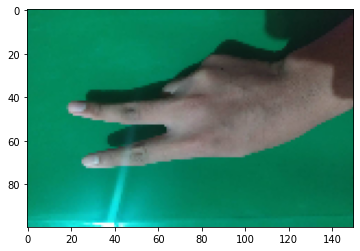

In [17]:
# kode untuk dapat memprediksi gambar yang diunggah ke Colab 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')